In [1]:
import json
import pandas as pd
import copy
import glob
import cv2
import matplotlib.pyplot as plt
import sys
import os
import numpy as np
sys.path.append(os.path.join('./','../pyunet'))
from lib.unet import UNet
from modules.train import Train
import torch
from lib.utils import get_image, get_mask, get_predicted_img, dice_score, count_parameters
import glob
from sklearn.model_selection import train_test_split
import shutil
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [2]:
img_dir  = "/home/ralampay/workspace/pysplitter/r-images/"
mask_dir = "/home/ralampay/workspace/pysplitter/r-masks/"

tmp_dir = "./tmp"

if os.path.exists(tmp_dir):
    shutil.rmtree(tmp_dir)

train_images_dir = "./tmp/train/images/"
train_masks_dir  = "./tmp/train/masks/"

test_images_dir  = "./tmp/test/images/"
test_masks_dir   = "./tmp/test/masks/"

os.makedirs(train_images_dir)
os.makedirs(train_masks_dir)
os.makedirs(test_images_dir)
os.makedirs(test_masks_dir)

images = sorted(glob.glob("{}/*".format(img_dir)))
masks  = sorted(glob.glob("{}/*".format(mask_dir)))

train_images, test_images, train_masks, test_masks = train_test_split(
    images,
    masks,
    test_size=0.3,
    random_state=42
)

for img_file in train_images:
    shutil.copy(img_file, train_images_dir)
    
for img_file in train_masks:
    shutil.copy(img_file, train_masks_dir)
    
for img_file in test_images:
    shutil.copy(img_file, test_images_dir)
    
for img_file in test_masks:
    shutil.copy(img_file, test_masks_dir)
    
    

In [3]:
img_height     = 128
img_width      = 128
device         = 'cuda'
gpu_index      = 0
input_img_dir  = train_images_dir
input_mask_dir = train_masks_dir
model_file     = "test.pth"
epochs         = 100
learning_rate  = 1e-004
in_channels    = 3
out_channels   = 5
batch_size     = 1
loss_type      = 'FL'
model_type     = 'unet_rd'

params = {
    'img_height':     img_height,
    'img_width':      img_width,
    'device':         device,
    'gpu_index':      gpu_index,
    'input_img_dir':  input_img_dir,
    'input_mask_dir': input_mask_dir,
    'epochs':         epochs,
    'learning_rate':  learning_rate,
    'in_channels':    in_channels,
    'out_channels':   out_channels,
    'loss_type':      loss_type,
    'batch_size':     batch_size,
    'model_file':     model_file,
    'test_img_dir':   test_images_dir,
    'test_mask_dir':  test_masks_dir,
    'model_type':     model_type
}

cmd = Train(params=params)

cmd.execute()

model = cmd.model

num_parameters = count_parameters(model)

print("Number of Parameters: {}".format(num_parameters))

Training model...
input_img_dir: ./tmp/train/images/
input_mask_dir: ./tmp/train/masks/
CUDA Device: NVIDIA GeForce RTX 3050 Laptop GPU
UNetRd(
  (ups): ModuleList(
    (0): ConvTranspose2d(1024, 512, kernel_size=(2, 2), stride=(2, 2))
    (1): NormalizedDoubleConv(
      (first_conv): DepthwiseSeperableConv(
        (depthwise): Conv2d(1024, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=1024, bias=False)
        (pointwise): Conv2d(1024, 512, kernel_size=(1, 1), stride=(1, 1), bias=False)
      )
      (first_norm): InstanceNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
      (first_actv): PReLU(num_parameters=512)
      (second_conv): DepthwiseSeperableConv(
        (depthwise): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=512, bias=False)
        (pointwise): Conv2d(512, 512, kernel_size=(1, 1), stride=(1, 1), bias=False)
      )
      (second_norm): InstanceNorm2d(512, eps=1e-05, momentum=0.1, affine=True

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 14.76it/s, loss=0.267]


Ave Loss: 0.7036301365494728
Ave Accuracy: 0.6904130415482954
Ave F1: 0.34225702479133013
Ave Precision: 0.3615021725558502
Ave Recall: 0.49565010692412487
Ave Specificity: 0.49565010692412487
Saving model to test.pth...
Epoch: 1


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 15.00it/s, loss=0.172]


Ave Loss: 0.498787734657526
Ave Accuracy: 0.7372852672230114
Ave F1: 0.3711960491573186
Ave Precision: 0.38315337434338104
Ave Recall: 0.5238343642467014
Ave Specificity: 0.5238343642467014
Saving model to test.pth...
Epoch: 2


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 14.17it/s, loss=0.126]


Ave Loss: 0.4032516673207283
Ave Accuracy: 0.7626703435724432
Ave F1: 0.38834043500326215
Ave Precision: 0.3977996131217404
Ave Recall: 0.5464512520403564
Ave Specificity: 0.5464512520403564
Saving model to test.pth...
Epoch: 3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 14.38it/s, loss=0.0934]


Ave Loss: 0.3335021886229515
Ave Accuracy: 0.7768443714488636
Ave F1: 0.39699616880605454
Ave Precision: 0.41325667310700387
Ave Recall: 0.5531769829718614
Ave Specificity: 0.5531769829718614
Saving model to test.pth...
Epoch: 4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 14.24it/s, loss=0.088]


Ave Loss: 0.2791192461550236
Ave Accuracy: 0.7974021218039773
Ave F1: 0.4036511828319533
Ave Precision: 0.43013587903870415
Ave Recall: 0.5532422229170292
Ave Specificity: 0.5532422229170292
Saving model to test.pth...
Epoch: 5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 14.57it/s, loss=0.112]


Ave Loss: 0.22988699443638325
Ave Accuracy: 0.7903248180042614
Ave F1: 0.39608683901024017
Ave Precision: 0.43796410842924643
Ave Recall: 0.5381646094301612
Ave Specificity: 0.5381646094301612
Saving model to test.pth...
Epoch: 6


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 14.51it/s, loss=0.0554]


Ave Loss: 0.18600263979285955
Ave Accuracy: 0.7932767001065341
Ave F1: 0.40147638289268706
Ave Precision: 0.43598960548013554
Ave Recall: 0.549264902613805
Ave Specificity: 0.549264902613805
Saving model to test.pth...
Epoch: 7


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 12.55it/s, loss=0.0442]


Ave Loss: 0.14082397118210793
Ave Accuracy: 0.7990361993963068
Ave F1: 0.4034966613105611
Ave Precision: 0.43605108799295134
Ave Recall: 0.5519763241089154
Ave Specificity: 0.5519763241089154
Saving model to test.pth...
Epoch: 8


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 13.54it/s, loss=0.0313]


Ave Loss: 0.10560246851295232
Ave Accuracy: 0.8113569779829546
Ave F1: 0.39922037401831445
Ave Precision: 0.49151337601334827
Ave Recall: 0.5272010333807168
Ave Specificity: 0.5299423719677491
Saving model to test.pth...
Epoch: 9


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 14.70it/s, loss=0.0309]


Ave Loss: 0.08647382274270057
Ave Accuracy: 0.8114568536931818
Ave F1: 0.4032897232484668
Ave Precision: 0.45941518250922203
Ave Recall: 0.5274674158999799
Ave Specificity: 0.5302957089307175
Saving model to test.pth...
Epoch: 10


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 15.00it/s, loss=0.0235]


Ave Loss: 0.07079854814335704
Ave Accuracy: 0.8186312588778409
Ave F1: 0.4024964497037459
Ave Precision: 0.4670732314734991
Ave Recall: 0.5317206968459954
Ave Specificity: 0.5317206968459954
Saving model to test.pth...
Epoch: 11


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 14.91it/s, loss=0.0177]


Ave Loss: 0.056632281076163055
Ave Accuracy: 0.8169000799005682
Ave F1: 0.3974355220673324
Ave Precision: 0.47052428605018276
Ave Recall: 0.5316813310474789
Ave Specificity: 0.5316813310474789
Saving model to test.pth...
Epoch: 12


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 15.07it/s, loss=0.0182]


Ave Loss: 0.04860572366975248
Ave Accuracy: 0.8046458851207386
Ave F1: 0.3995148639270871
Ave Precision: 0.5067361048197956
Ave Recall: 0.5216744899607548
Ave Specificity: 0.5270493641668089
Saving model to test.pth...
Epoch: 13


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 14.76it/s, loss=0.00965]


Ave Loss: 0.04927278108894825
Ave Accuracy: 0.8211115056818182
Ave F1: 0.4072503072089823
Ave Precision: 0.5073972747251778
Ave Recall: 0.5316391197112179
Ave Specificity: 0.534301788785661
Saving model to test.pth...
Epoch: 14


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 13.96it/s, loss=0.00921]


Ave Loss: 0.0398919444065541
Ave Accuracy: 0.8218605735085227
Ave F1: 0.4045390820857643
Ave Precision: 0.47267050611244693
Ave Recall: 0.5364012749599928
Ave Specificity: 0.5364012749599928
Saving model to test.pth...
Epoch: 15


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:04<00:00, 11.96it/s, loss=0.0081]


Ave Loss: 0.032362702819518745
Ave Accuracy: 0.8231617320667614
Ave F1: 0.40488320260611704
Ave Precision: 0.480151675367009
Ave Recall: 0.5364383944533575
Ave Specificity: 0.5364383944533575
Saving model to test.pth...
Epoch: 16


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 13.05it/s, loss=0.00621]


Ave Loss: 0.026421769256703555
Ave Accuracy: 0.8251786665482954
Ave F1: 0.4012274168816814
Ave Precision: 0.47580480994108515
Ave Recall: 0.5375462764518569
Ave Specificity: 0.5375462764518569
Saving model to test.pth...
Epoch: 17


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 12.76it/s, loss=0.00594]


Ave Loss: 0.02275951405055821
Ave Accuracy: 0.8227871981534091
Ave F1: 0.41538151250525357
Ave Precision: 0.5023510433410742
Ave Recall: 0.5215027159744644
Ave Specificity: 0.5336248333207875
Saving model to test.pth...
Epoch: 18


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 13.11it/s, loss=0.00677]


Ave Loss: 0.020268386523239316
Ave Accuracy: 0.8182317560369318
Ave F1: 0.3965987217261803
Ave Precision: 0.4653574771318389
Ave Recall: 0.5281945357736147
Ave Specificity: 0.5281945357736147
Saving model to test.pth...
Epoch: 19


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:04<00:00, 11.99it/s, loss=0.0085]


Ave Loss: 0.018210212292615324
Ave Accuracy: 0.8141756924715909
Ave F1: 0.3967244909338741
Ave Precision: 0.45571280157921895
Ave Recall: 0.526479189220914
Ave Specificity: 0.526479189220914
Saving model to test.pth...
Epoch: 20


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 12.91it/s, loss=0.00477]


Ave Loss: 0.016570463026873768
Ave Accuracy: 0.8203319202769886
Ave F1: 0.4078824553058629
Ave Precision: 0.4750826142612524
Ave Recall: 0.5311292579393107
Ave Specificity: 0.5338050449473262
Saving model to test.pth...
Epoch: 21


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 13.03it/s, loss=0.00369]


Ave Loss: 0.015143738435581327
Ave Accuracy: 0.8295759721235796
Ave F1: 0.4176083459706535
Ave Precision: 0.49405792607212207
Ave Recall: 0.5371397422945575
Ave Specificity: 0.5423647283828009
Saving model to test.pth...
Epoch: 22


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 13.00it/s, loss=0.00329]


Ave Loss: 0.013407602654770017
Ave Accuracy: 0.8263688520951704
Ave F1: 0.41163356594944217
Ave Precision: 0.47931566620875315
Ave Recall: 0.5324901985637783
Ave Specificity: 0.5377009754118555
Saving model to test.pth...
Epoch: 23


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 12.55it/s, loss=0.00318]


Ave Loss: 0.012009384664706886
Ave Accuracy: 0.8193747780539773
Ave F1: 0.4033257136011331
Ave Precision: 0.45935476923871227
Ave Recall: 0.5326186866441738
Ave Specificity: 0.5352513096852228
Saving model to test.pth...
Epoch: 24


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 13.02it/s, loss=0.00277]


Ave Loss: 0.01090810957015492
Ave Accuracy: 0.8177656693892046
Ave F1: 0.40166511173917513
Ave Precision: 0.46602579391192767
Ave Recall: 0.5327785997242404
Ave Specificity: 0.5354113662673096
Saving model to test.pth...
Epoch: 25


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 13.06it/s, loss=0.00248]


Ave Loss: 0.009997060589957982
Ave Accuracy: 0.8234419389204546
Ave F1: 0.4088862836367404
Ave Precision: 0.4641830688566445
Ave Recall: 0.5375001562177433
Ave Specificity: 0.5401231415436892
Saving model to test.pth...
Epoch: 26


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 13.85it/s, loss=0.00218]


Ave Loss: 0.00921481685130857
Ave Accuracy: 0.8215997869318182
Ave F1: 0.4046521781934262
Ave Precision: 0.4695002129624196
Ave Recall: 0.5317565379913024
Ave Specificity: 0.5343701409485404
Saving model to test.pth...
Epoch: 27


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 14.53it/s, loss=0.00187]


Ave Loss: 0.008394957137061282
Ave Accuracy: 0.8148692737926136
Ave F1: 0.3979224452271694
Ave Precision: 0.46102584826646636
Ave Recall: 0.5283446248662427
Ave Specificity: 0.530964341350761
Saving model to test.pth...
Epoch: 28


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 14.22it/s, loss=0.00185]


Ave Loss: 0.00787489494890906
Ave Accuracy: 0.8143532492897727
Ave F1: 0.3936360805486638
Ave Precision: 0.45933119003502365
Ave Recall: 0.5294668835716682
Ave Specificity: 0.5294668835716682
Saving model to test.pth...
Epoch: 29


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 14.44it/s, loss=0.0017]


Ave Loss: 0.007226978787803091
Ave Accuracy: 0.8136846368963068
Ave F1: 0.39707618296790376
Ave Precision: 0.47714944630791617
Ave Recall: 0.5195101994601753
Ave Specificity: 0.5247195196629673
Saving model to test.pth...
Epoch: 30


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 14.28it/s, loss=0.00149]


Ave Loss: 0.00666669040452689
Ave Accuracy: 0.8144170587713068
Ave F1: 0.3979756662406549
Ave Precision: 0.48108829692106103
Ave Recall: 0.5190715077720474
Ave Specificity: 0.5244094829278441
Saving model to test.pth...
Epoch: 31


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 14.02it/s, loss=0.00134]


Ave Loss: 0.006252978263655677
Ave Accuracy: 0.811065673828125
Ave F1: 0.3979503461989334
Ave Precision: 0.45097336626563644
Ave Recall: 0.5206085229581862
Ave Specificity: 0.5259375462633481
Saving model to test.pth...
Epoch: 32


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 14.57it/s, loss=0.00136]


Ave Loss: 0.005841985997976735
Ave Accuracy: 0.8115900213068182
Ave F1: 0.3935566944043709
Ave Precision: 0.44981636265392366
Ave Recall: 0.52183068899188
Ave Specificity: 0.5245292675528437
Saving model to test.pth...
Epoch: 33


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 14.57it/s, loss=0.0012]


Ave Loss: 0.005536787800374441
Ave Accuracy: 0.81524658203125
Ave F1: 0.39721950021592717
Ave Precision: 0.46003407253243334
Ave Recall: 0.519642757744566
Ave Specificity: 0.5269436066759627
Saving model to test.pth...
Epoch: 34


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 14.70it/s, loss=0.00116]


Ave Loss: 0.005332908102427609
Ave Accuracy: 0.8142006613991477
Ave F1: 0.4006750779529502
Ave Precision: 0.45347622114145075
Ave Recall: 0.5209161910192207
Ave Specificity: 0.5262668039426487
Saving model to test.pth...
Epoch: 35


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 14.57it/s, loss=0.00113]


Ave Loss: 0.005052634035237134
Ave Accuracy: 0.8068514737215909
Ave F1: 0.3888306791661167
Ave Precision: 0.4481312934799432
Ave Recall: 0.5180198687919533
Ave Specificity: 0.5206657339226581
Saving model to test.pth...
Epoch: 36


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 14.56it/s, loss=0.00107]


Ave Loss: 0.004765842964407057
Ave Accuracy: 0.816162109375
Ave F1: 0.4046889251138533
Ave Precision: 0.463980834585878
Ave Recall: 0.5150792730241961
Ave Specificity: 0.5230520033079654
Saving model to test.pth...
Epoch: 37


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 14.56it/s, loss=0.00099]


Ave Loss: 0.004602563893422484
Ave Accuracy: 0.8173800381747159
Ave F1: 0.40538824498271103
Ave Precision: 0.46744690148626783
Ave Recall: 0.5188303317970823
Ave Specificity: 0.5285592688845154
Saving model to test.pth...
Epoch: 38


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 14.65it/s, loss=0.000963]


Ave Loss: 0.00450975835963618
Ave Accuracy: 0.8107549493963068
Ave F1: 0.4006740747902888
Ave Precision: 0.45708282870322653
Ave Recall: 0.5238984441686649
Ave Specificity: 0.5291428376737678
Saving model to test.pth...
Epoch: 39


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 14.36it/s, loss=0.000917]


Ave Loss: 0.004358180797134991
Ave Accuracy: 0.8132046786221591
Ave F1: 0.3974626038579037
Ave Precision: 0.4525696574393346
Ave Recall: 0.5181268334382662
Ave Specificity: 0.5234584367839894
Saving model to test.pth...
Epoch: 40


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:04<00:00, 12.29it/s, loss=0.000897]


Ave Loss: 0.0041477313853101805
Ave Accuracy: 0.8213029341264204
Ave F1: 0.4228605431395705
Ave Precision: 0.49134935562586857
Ave Recall: 0.5167214577920707
Ave Specificity: 0.5332264412007895
Saving model to test.pth...
Epoch: 41


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 12.60it/s, loss=0.000875]


Ave Loss: 0.0039051302836742253
Ave Accuracy: 0.8146889426491477
Ave F1: 0.4047286573677606
Ave Precision: 0.461466753853137
Ave Recall: 0.5296776797237207
Ave Specificity: 0.5349471725030835
Saving model to test.pth...
Epoch: 42


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:04<00:00, 12.09it/s, loss=0.000791]


Ave Loss: 0.0036728787460015154
Ave Accuracy: 0.8123779296875
Ave F1: 0.406197727649363
Ave Precision: 0.45825446654452473
Ave Recall: 0.5244885244190521
Ave Specificity: 0.5324140508846583
Saving model to test.pth...
Epoch: 43


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:04<00:00, 12.34it/s, loss=0.000753]


Ave Loss: 0.00347306208248483
Ave Accuracy: 0.8185813210227273
Ave F1: 0.41356177572894914
Ave Precision: 0.4693361864089507
Ave Recall: 0.5277866884714068
Ave Specificity: 0.5357143530361905
Saving model to test.pth...
Epoch: 44


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 12.74it/s, loss=0.000722]


Ave Loss: 0.0032807360059814526
Ave Accuracy: 0.8204512162642046
Ave F1: 0.4094195773921774
Ave Precision: 0.4610467539356959
Ave Recall: 0.5340909660826526
Ave Specificity: 0.5393193458691328
Saving model to test.pth...
Epoch: 45


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 14.00it/s, loss=0.000661]


Ave Loss: 0.0031092114705825223
Ave Accuracy: 0.81640625
Ave F1: 0.4195796040551841
Ave Precision: 0.46762932979691896
Ave Recall: 0.5291391156845676
Ave Specificity: 0.5413777907303461
Saving model to test.pth...
Epoch: 46


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:04<00:00, 10.89it/s, loss=0.000634]


Ave Loss: 0.0029777119404752737
Ave Accuracy: 0.8145835182883523
Ave F1: 0.4109182724725065
Ave Precision: 0.4593280599266387
Ave Recall: 0.5287983732643606
Ave Specificity: 0.5367284940948213
Saving model to test.pth...
Epoch: 47


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 12.74it/s, loss=0.000627]


Ave Loss: 0.0028136418570647945
Ave Accuracy: 0.8181984641335227
Ave F1: 0.4172784911754507
Ave Precision: 0.4801712825629822
Ave Recall: 0.522464094584076
Ave Specificity: 0.5347055909262388
Saving model to test.pth...
Epoch: 48


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 12.66it/s, loss=0.000563]


Ave Loss: 0.002725574475771282
Ave Accuracy: 0.817047119140625
Ave F1: 0.4052552997080783
Ave Precision: 0.4542421558944481
Ave Recall: 0.5346657433789875
Ave Specificity: 0.5399005644002028
Saving model to test.pth...
Epoch: 49


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 12.80it/s, loss=0.000554]


Ave Loss: 0.0026705155285890216
Ave Accuracy: 0.8095730868252841
Ave F1: 0.403479709738729
Ave Precision: 0.44786390343418514
Ave Recall: 0.5319951700002957
Ave Specificity: 0.5372803935779271
Saving model to test.pth...
Epoch: 50


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 12.69it/s, loss=0.00059]


Ave Loss: 0.0027590153031633235
Ave Accuracy: 0.8206898082386364
Ave F1: 0.404744514668792
Ave Precision: 0.4565454415497292
Ave Recall: 0.5286784504231327
Ave Specificity: 0.5339832096030477
Saving model to test.pth...
Epoch: 51


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 12.64it/s, loss=0.000643]


Ave Loss: 0.0029524890740867706
Ave Accuracy: 0.8240079012784091
Ave F1: 0.4183401493823213
Ave Precision: 0.47152796399960367
Ave Recall: 0.5264806823202808
Ave Specificity: 0.5385498115384885
Saving model to test.pth...
Epoch: 52


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 12.78it/s, loss=0.000668]


Ave Loss: 0.0028504781911033207
Ave Accuracy: 0.8184037642045454
Ave F1: 0.40295883631713936
Ave Precision: 0.45407574571383796
Ave Recall: 0.5394821232100739
Ave Specificity: 0.5421409314163821
Saving model to test.pth...
Epoch: 53


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 12.83it/s, loss=0.000552]


Ave Loss: 0.0025620641998830252
Ave Accuracy: 0.8163313432173296
Ave F1: 0.40869462556992836
Ave Precision: 0.4528368247904124
Ave Recall: 0.5309003995974604
Ave Specificity: 0.5388223177646655
Saving model to test.pth...
Epoch: 54


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 12.83it/s, loss=0.000562]


Ave Loss: 0.0024028725767857393
Ave Accuracy: 0.8186590021306818
Ave F1: 0.3973003431211153
Ave Precision: 0.46150622548691883
Ave Recall: 0.5215123374598176
Ave Specificity: 0.5267060599807224
Saving model to test.pth...
Epoch: 55


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 12.77it/s, loss=0.000488]


Ave Loss: 0.0022403064466197976
Ave Accuracy: 0.8188809481534091
Ave F1: 0.4074327004011373
Ave Precision: 0.4780614715463351
Ave Recall: 0.5258263402753017
Ave Specificity: 0.535296260732208
Saving model to test.pth...
Epoch: 56


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 12.60it/s, loss=0.000439]


Ave Loss: 0.002045187929616077
Ave Accuracy: 0.8176241787997159
Ave F1: 0.41448759255361173
Ave Precision: 0.48056321743214897
Ave Recall: 0.5268450071094672
Ave Specificity: 0.5390198405655454
Saving model to test.pth...
Epoch: 57


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 12.73it/s, loss=0.000411]


Ave Loss: 0.0018926726194331423
Ave Accuracy: 0.8154185901988636
Ave F1: 0.4057253183165963
Ave Precision: 0.473071094749721
Ave Recall: 0.5228094746354138
Ave Specificity: 0.5323983524164914
Saving model to test.pth...
Epoch: 58


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 12.58it/s, loss=0.000393]


Ave Loss: 0.0017993684667453635
Ave Accuracy: 0.8143338290127841
Ave F1: 0.3996994107820757
Ave Precision: 0.46266532857722004
Ave Recall: 0.5289715291163156
Ave Specificity: 0.5342104935689289
Saving model to test.pth...
Epoch: 59


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 12.65it/s, loss=0.000375]


Ave Loss: 0.0017574686277657748
Ave Accuracy: 0.8163674094460227
Ave F1: 0.4056247676455749
Ave Precision: 0.4607189196231689
Ave Recall: 0.5349733502376044
Ave Specificity: 0.5402291598325072
Saving model to test.pth...
Epoch: 60


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 12.67it/s, loss=0.000368]


Ave Loss: 0.0016570944296836387
Ave Accuracy: 0.8128495649857954
Ave F1: 0.39616563072044947
Ave Precision: 0.4572066354060629
Ave Recall: 0.5393705430984107
Ave Specificity: 0.5393705430984107
Saving model to test.pth...
Epoch: 61


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:04<00:00, 12.04it/s, loss=0.000344]


Ave Loss: 0.0015667370120354463
Ave Accuracy: 0.8131297718394886
Ave F1: 0.3981061626351928
Ave Precision: 0.45563569976026136
Ave Recall: 0.534234102880196
Ave Specificity: 0.5368715417066459
Saving model to test.pth...
Epoch: 62


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:04<00:00, 11.48it/s, loss=0.000319]


Ave Loss: 0.001499049151025247
Ave Accuracy: 0.807464599609375
Ave F1: 0.39694940839019216
Ave Precision: 0.4472153833040894
Ave Recall: 0.5367508813997948
Ave Specificity: 0.5394024793246038
Saving model to test.pth...
Epoch: 63


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:04<00:00, 12.48it/s, loss=0.000317]


Ave Loss: 0.0014374162672902457
Ave Accuracy: 0.8100142045454546
Ave F1: 0.39642125496184166
Ave Precision: 0.4402482978787814
Ave Recall: 0.5356312824131012
Ave Specificity: 0.5382756577314158
Saving model to test.pth...
Epoch: 64


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:04<00:00, 11.88it/s, loss=0.000328]


Ave Loss: 0.0014220715468400158
Ave Accuracy: 0.8096757368607954
Ave F1: 0.39073046457538557
Ave Precision: 0.4373059853992428
Ave Recall: 0.5352623903462784
Ave Specificity: 0.5352623903462784
Saving model to test.pth...
Epoch: 65


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 13.31it/s, loss=0.000296]


Ave Loss: 0.0013940510294924025
Ave Accuracy: 0.8104359019886364
Ave F1: 0.41187073846644306
Ave Precision: 0.45932616764503853
Ave Recall: 0.5260956248728905
Ave Specificity: 0.5381031709006634
Saving model to test.pth...
Epoch: 66


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:04<00:00, 11.67it/s, loss=0.000281]


Ave Loss: 0.0013285103143425658
Ave Accuracy: 0.8096036044034091
Ave F1: 0.39783536191801633
Ave Precision: 0.44226044215411286
Ave Recall: 0.5304704350097121
Ave Specificity: 0.5357011843069824
Saving model to test.pth...
Epoch: 67


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 12.87it/s, loss=0.000271]


Ave Loss: 0.0012668617970484776
Ave Accuracy: 0.8116066672585227
Ave F1: 0.4094788581621073
Ave Precision: 0.45758303560507224
Ave Recall: 0.5218488375593046
Ave Specificity: 0.5339020089680353
Saving model to test.pth...
Epoch: 68


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 12.97it/s, loss=0.000253]


Ave Loss: 0.0012116767505358438
Ave Accuracy: 0.8096590909090909
Ave F1: 0.40352785226873417
Ave Precision: 0.45267697903794823
Ave Recall: 0.5245388167957583
Ave Specificity: 0.5341069101250376
Saving model to test.pth...
Epoch: 69


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:04<00:00, 12.34it/s, loss=0.000261]


Ave Loss: 0.0011638713614956942
Ave Accuracy: 0.8121310147372159
Ave F1: 0.41231658157961704
Ave Precision: 0.459544409471161
Ave Recall: 0.5228943445676963
Ave Specificity: 0.5350119939798909
Saving model to test.pth...
Epoch: 70


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 12.89it/s, loss=0.000238]


Ave Loss: 0.001136428779354901
Ave Accuracy: 0.81097412109375
Ave F1: 0.39752891538811264
Ave Precision: 0.4462040862308419
Ave Recall: 0.5266188861507954
Ave Specificity: 0.5318333127282724
Saving model to test.pth...
Epoch: 71


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 12.87it/s, loss=0.000236]


Ave Loss: 0.0010907330601185095
Ave Accuracy: 0.8111544522372159
Ave F1: 0.40582738031131077
Ave Precision: 0.4553351209595903
Ave Recall: 0.5302878833082991
Ave Specificity: 0.5371720655709923
Saving model to test.pth...
Epoch: 72


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 12.64it/s, loss=0.000222]


Ave Loss: 0.0010481726806756341
Ave Accuracy: 0.8092151988636364
Ave F1: 0.4012259980302477
Ave Precision: 0.44942322767549
Ave Recall: 0.5323880353526099
Ave Specificity: 0.5376115613911944
Saving model to test.pth...
Epoch: 73


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 12.83it/s, loss=0.000224]


Ave Loss: 0.0010200070787686854
Ave Accuracy: 0.8097978071732954
Ave F1: 0.3966167261125916
Ave Precision: 0.4435651329722168
Ave Recall: 0.5306047456973922
Ave Specificity: 0.5331916214406317
Saving model to test.pth...
Epoch: 74


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:04<00:00, 12.48it/s, loss=0.000212]


Ave Loss: 0.0009931307944498259
Ave Accuracy: 0.8063548694957386
Ave F1: 0.40365454526431344
Ave Precision: 0.4510238214765659
Ave Recall: 0.5220111472724104
Ave Specificity: 0.5317282839456113
Saving model to test.pth...
Epoch: 75


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 12.66it/s, loss=0.000199]


Ave Loss: 0.0009796583729621488
Ave Accuracy: 0.8092679110440341
Ave F1: 0.40607092188269517
Ave Precision: 0.4481167581461474
Ave Recall: 0.5290070340110169
Ave Specificity: 0.5369277660449604
Saving model to test.pth...
Epoch: 76


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:04<00:00, 12.04it/s, loss=0.000221]


Ave Loss: 0.0009381829018093413
Ave Accuracy: 0.8067515980113636
Ave F1: 0.3904841059480399
Ave Precision: 0.43241509797138705
Ave Recall: 0.5273260558872213
Ave Specificity: 0.5300021696250803
Saving model to test.pth...
Epoch: 77


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 13.60it/s, loss=0.00019]


Ave Loss: 0.0009087987412203802
Ave Accuracy: 0.8062244762073864
Ave F1: 0.40187658682877064
Ave Precision: 0.4478984540286446
Ave Recall: 0.5178365333441002
Ave Specificity: 0.5273807072842813
Saving model to test.pth...
Epoch: 78


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:04<00:00, 10.62it/s, loss=0.000176]


Ave Loss: 0.0008987097677891142
Ave Accuracy: 0.8063798384232954
Ave F1: 0.3911868072567979
Ave Precision: 0.43260923783607874
Ave Recall: 0.5230994805818695
Ave Specificity: 0.5283445883733145
Saving model to test.pth...
Epoch: 79


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:04<00:00, 11.82it/s, loss=0.000192]


Ave Loss: 0.0008903455680410843
Ave Accuracy: 0.8097783868963068
Ave F1: 0.394670682452456
Ave Precision: 0.43128025681906706
Ave Recall: 0.5221655894150977
Ave Specificity: 0.5273407903368669
Saving model to test.pth...
Epoch: 80


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:04<00:00, 11.99it/s, loss=0.000182]


Ave Loss: 0.0008753239817451686
Ave Accuracy: 0.8105690696022727
Ave F1: 0.4063219969555305
Ave Precision: 0.4623970439021044
Ave Recall: 0.5122138860821394
Ave Specificity: 0.5261415115237541
Saving model to test.pth...
Epoch: 81


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:04<00:00, 12.45it/s, loss=0.000201]


Ave Loss: 0.0008441763702285244
Ave Accuracy: 0.8066628196022727
Ave F1: 0.40830517985115067
Ave Precision: 0.45082071582528493
Ave Recall: 0.5147379243384925
Ave Specificity: 0.5287465709881028
Saving model to test.pth...
Epoch: 82


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:04<00:00, 12.13it/s, loss=0.00018]


Ave Loss: 0.000806472411059076
Ave Accuracy: 0.8126442649147727
Ave F1: 0.40243166936609
Ave Precision: 0.4583244742551653
Ave Recall: 0.5256437093641689
Ave Specificity: 0.533572398774642
Saving model to test.pth...
Epoch: 83


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:04<00:00, 12.13it/s, loss=0.000181]


Ave Loss: 0.0008083534290199168
Ave Accuracy: 0.8107161088423296
Ave F1: 0.39796368804613286
Ave Precision: 0.4437489121166575
Ave Recall: 0.5197981404410607
Ave Specificity: 0.5266981236961908
Saving model to test.pth...
Epoch: 84


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:04<00:00, 11.90it/s, loss=0.000195]


Ave Loss: 0.0008329822215455352
Ave Accuracy: 0.8092901056463068
Ave F1: 0.4044631824331892
Ave Precision: 0.4572341804204054
Ave Recall: 0.5200718549939538
Ave Specificity: 0.5297008519464182
Saving model to test.pth...
Epoch: 85


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:04<00:00, 12.05it/s, loss=0.000227]


Ave Loss: 0.0008740048963227309
Ave Accuracy: 0.8081609552556818
Ave F1: 0.39292118236776585
Ave Precision: 0.4328210915323876
Ave Recall: 0.5332356177277727
Ave Specificity: 0.5332356177277727
Saving model to test.pth...
Epoch: 86


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:04<00:00, 12.38it/s, loss=0.000284]


Ave Loss: 0.0009100102092634188
Ave Accuracy: 0.8084439364346591
Ave F1: 0.3946973753680492
Ave Precision: 0.43097944872629784
Ave Recall: 0.5283331021540053
Ave Specificity: 0.530945575757276
Saving model to test.pth...
Epoch: 87


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:04<00:00, 12.02it/s, loss=0.000414]


Ave Loss: 0.0011886498810054036
Ave Accuracy: 0.8211614435369318
Ave F1: 0.4006230294194927
Ave Precision: 0.466972012688178
Ave Recall: 0.5230816957087895
Ave Specificity: 0.5327291361371741
Saving model to test.pth...
Epoch: 88


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:04<00:00, 11.52it/s, loss=0.0021]


Ave Loss: 0.002025056437851163
Ave Accuracy: 0.8087824041193182
Ave F1: 0.391812779700191
Ave Precision: 0.4348879704154662
Ave Recall: 0.5267609583951086
Ave Specificity: 0.5267609583951086
Saving model to test.pth...
Epoch: 89


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:04<00:00, 11.71it/s, loss=0.0849]


Ave Loss: 0.3284456865862012
Ave Accuracy: 0.7521140358664773
Ave F1: 0.3338826044018101
Ave Precision: 0.5280273240089884
Ave Recall: 0.4622447326578602
Ave Specificity: 0.46954555767548106
Saving model to test.pth...
Epoch: 90


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:04<00:00, 12.01it/s, loss=0.0478]


Ave Loss: 0.18500461887568234
Ave Accuracy: 0.7921475497159091
Ave F1: 0.39040523190804066
Ave Precision: 0.5354948893031837
Ave Recall: 0.506238119599769
Ave Specificity: 0.5145024219658514
Saving model to test.pth...
Epoch: 91


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 13.01it/s, loss=0.0374]


Ave Loss: 0.1330962748453021
Ave Accuracy: 0.8060164018110796
Ave F1: 0.41475306541638246
Ave Precision: 0.521825869902837
Ave Recall: 0.5225388779592879
Ave Specificity: 0.5349200927271623
Saving model to test.pth...
Epoch: 92


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 12.68it/s, loss=0.0286]


Ave Loss: 0.10129103612154722
Ave Accuracy: 0.8142200816761364
Ave F1: 0.418041529113556
Ave Precision: 0.5006717735112379
Ave Recall: 0.5303225935539776
Ave Specificity: 0.5409058965570362
Saving model to test.pth...
Epoch: 93


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:04<00:00, 10.46it/s, loss=0.0235]


Ave Loss: 0.07052241835743189
Ave Accuracy: 0.8201377175071023
Ave F1: 0.4231380154904525
Ave Precision: 0.5037907271234785
Ave Recall: 0.5386992088718272
Ave Specificity: 0.5457416688019359
Saving model to test.pth...
Epoch: 94


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:06<00:00,  8.04it/s, loss=0.0193]


Ave Loss: 0.045460658064112064
Ave Accuracy: 0.82366943359375
Ave F1: 0.43245133554493564
Ave Precision: 0.5258988588083875
Ave Recall: 0.5299172943805056
Ave Specificity: 0.5443805829886181
Saving model to test.pth...
Epoch: 95


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:05<00:00,  8.93it/s, loss=0.0136]


Ave Loss: 0.02915619852952659
Ave Accuracy: 0.8231284401633523
Ave F1: 0.4293661077910174
Ave Precision: 0.5184746103564696
Ave Recall: 0.5291774230935024
Ave Specificity: 0.5420497142320166
Saving model to test.pth...
Epoch: 96


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:04<00:00, 10.36it/s, loss=0.00917]


Ave Loss: 0.02067937210202217
Ave Accuracy: 0.8232893510298296
Ave F1: 0.425853549643087
Ave Precision: 0.5115688416704453
Ave Recall: 0.5277915306795081
Ave Specificity: 0.5403885378892398
Saving model to test.pth...
Epoch: 97


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:04<00:00, 10.60it/s, loss=0.0059]


Ave Loss: 0.016174089536070822
Ave Accuracy: 0.8329190340909091
Ave F1: 0.4311996989327852
Ave Precision: 0.5149085219387194
Ave Recall: 0.5406524031994143
Ave Specificity: 0.5505093089117821
Saving model to test.pth...
Epoch: 98


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 12.55it/s, loss=0.00578]


Ave Loss: 0.01359885442070663
Ave Accuracy: 0.8326943137428977
Ave F1: 0.43620982593536434
Ave Precision: 0.5179786367716167
Ave Recall: 0.5345558665689649
Ave Specificity: 0.5470889297121633
Saving model to test.pth...
Epoch: 99


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:04<00:00, 11.88it/s, loss=0.00493]


Ave Loss: 0.011170413824729622
Ave Accuracy: 0.8309159712357954
Ave F1: 0.4311125442348363
Ave Precision: 0.5025696510440258
Ave Recall: 0.5380013106384698
Ave Specificity: 0.5477283061560736
Saving model to test.pth...
Number of Parameters: 26382176


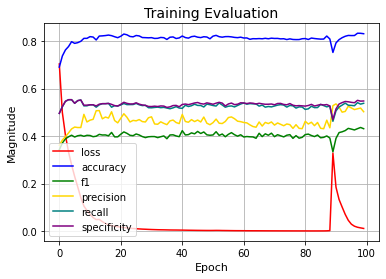

In [4]:
plt.plot(cmd.losses, label='loss', color='red')
plt.plot(cmd.accuracies, label='accuracy', color='blue')
plt.plot(cmd.f1s, label='f1', color='green')
plt.plot(cmd.precisions, label='precision', color='gold')
plt.plot(cmd.recalls, label='recall', color='teal')
plt.plot(cmd.specificities, label='specificity', color='purple')
plt.title('Training Evaluation', fontsize=14)
plt.xlabel('Epoch', fontsize=11)
plt.ylabel('Magnitude', fontsize=11)
plt.grid(True)
plt.legend()
plt.show()

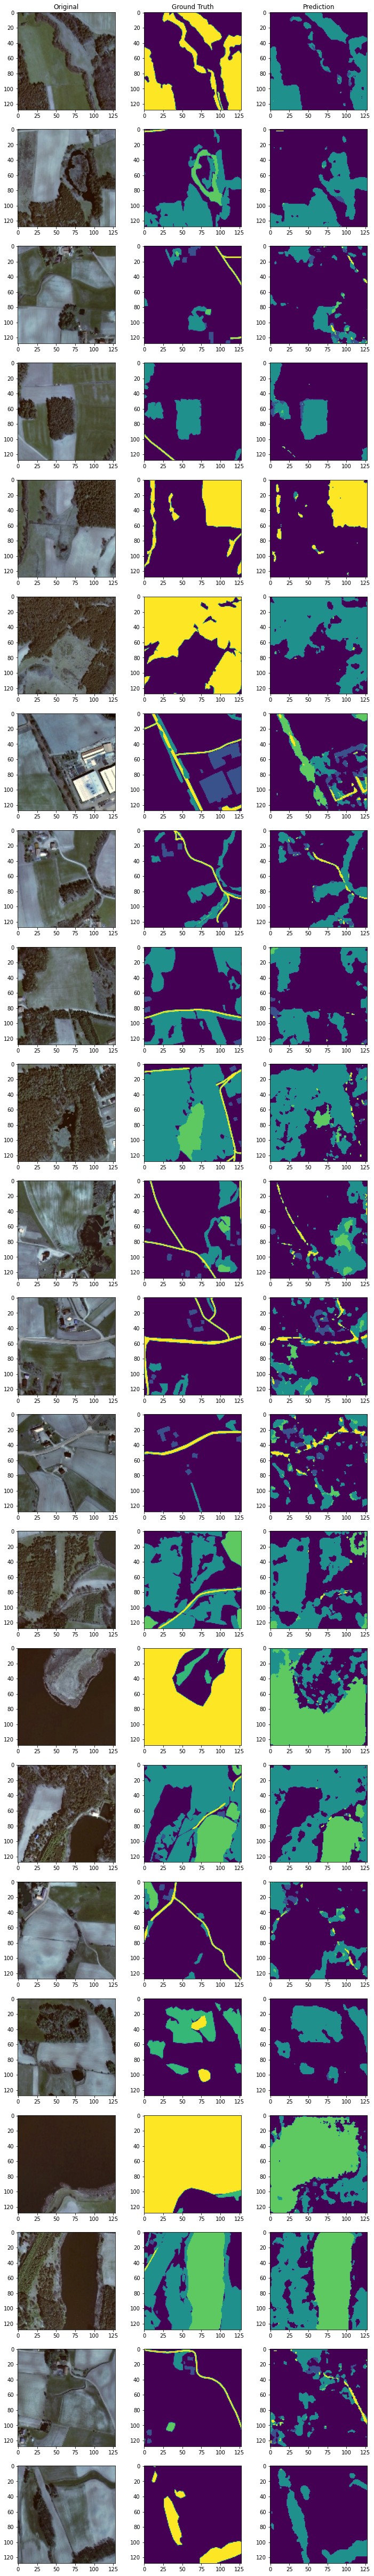

In [5]:
images = sorted(glob.glob("{}/*".format(test_images_dir)))
masks  = sorted(glob.glob("{}/*".format(test_masks_dir)))

dim = (img_width, img_height)

num_images = len(images)
num_cols   = 3

col_names = [
    "Original",
    "Ground Truth",
    "Prediction"
]

fig, axes = plt.subplots(nrows=num_images, ncols=num_cols, figsize=(num_cols*4, num_images*4))

for ax, col in zip(axes[0], col_names):
    ax.set_title(col)
    
counter = 0

scores = []

for i in range(num_images):
    image_file = images[i]
    mask_file  = masks[i]
    
    img  = get_image(image_file, dim)
    mask = get_mask(mask_file, dim)
    
    prediction = get_predicted_img(img, model)
    
    counter += 1
    
    plt.subplot(num_images, num_cols, counter)
    plt.imshow(img)
    
    counter += 1
    
    plt.subplot(num_images, num_cols, counter)
    plt.imshow(mask)
    
    counter += 1
    
    plt.subplot(num_images, num_cols, counter)
    plt.imshow(prediction)
    
    mask_vectorized = mask.ravel().astype(int)
    prediction_vectorized = prediction.ravel().astype(int)
    
    macro_score = jaccard_score(mask_vectorized, prediction_vectorized, average='macro')
    label_score = jaccard_score(mask_vectorized, prediction_vectorized, average=None)
    
    label_specificity = recall_score(mask_vectorized, prediction_vectorized, labels=[0, 1, 2, 3, 4], average=None, zero_division=1)
    label_recall      = recall_score(mask_vectorized, prediction_vectorized, average=None, zero_division=1)
    
    f1          = f1_score(mask_vectorized, prediction_vectorized, average='macro', zero_division=1)
    accuracy    = accuracy_score(mask_vectorized, prediction_vectorized)
    precision   = precision_score(mask_vectorized, prediction_vectorized, average='macro', zero_division=1)
    recall      = recall_score(mask_vectorized, prediction_vectorized, average='macro', zero_division=1) # sensitivity
    specificity = recall_score(mask_vectorized, prediction_vectorized, labels=[0, 1, 2, 3, 4], average='macro', zero_division=1)
    
    jaccard_score_0 = None
    jaccard_score_1 = None
    jaccard_score_2 = None
    jaccard_score_3 = None
    jaccard_score_4 = None
    
    specificity_0 = None
    specificity_1 = None
    specificity_2 = None
    specificity_3 = None
    specificity_4 = None
    
    recall_0 = None
    recall_1 = None
    recall_2 = None
    recall_3 = None
    recall_4 = None
    
    dice_0 = dice_score(mask_vectorized, prediction_vectorized, k=0)
    dice_1 = dice_score(mask_vectorized, prediction_vectorized, k=1)
    dice_2 = dice_score(mask_vectorized, prediction_vectorized, k=2)
    dice_3 = dice_score(mask_vectorized, prediction_vectorized, k=3)
    dice_4 = dice_score(mask_vectorized, prediction_vectorized, k=4)
    
    for i in range(len(label_score)):
        if i == 0:
            jaccard_score_0 = label_score[i]
        elif i == 1:
            jaccard_score_1 = label_score[i]
        elif i == 2:
            jaccard_score_2 = label_score[i]
        elif i == 3:
            jaccard_score_3 = label_score[i]
        elif i == 4:
            jaccard_score_4 = label_score[i]
            
    for i in range(len(label_specificity)):
        if i == 0:
            specificity_0    = label_specificity[i]
        elif i == 1:
            specificity_1    = label_specificity[i]
        elif i == 2:
            specificity_2    = label_specificity[i]
        elif i == 3:
            specificity_3    = label_specificity[i]
        elif i == 4:
            specificity_4    = label_specificity[i]
            
    for i in range(len(label_recall)):
        if i == 0:
            recall_0 = label_recall[i]
        elif i == 1:
            recall_1 = label_recall[i]
        elif i == 2:
            recall_2 = label_recall[i]
        elif i == 3:
            recall_3 = label_recall[i]
        elif i == 4:
            recall_4 = label_recall[i]
        
    
    
    scores.append({
        'image_file':  image_file,
        'mask_file':   mask_file,
        'jaccard_score': macro_score,
        'f1_score': f1,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'precision': precision,
        'specificity': specificity,
        'jaccard_score_0': jaccard_score_0,
        'jaccard_score_1': jaccard_score_1,
        'jaccard_score_2': jaccard_score_2,
        'jaccard_score_3': jaccard_score_3,
        'jaccard_score_4': jaccard_score_4,
        'specificity_0': specificity_0,
        'specificity_1': specificity_1,
        'specificity_2': specificity_2,
        'specificity_3': specificity_3,
        'specificity_4': specificity_4,
        'recall_0': recall_0,
        'recall_1': recall_1,
        'recall_2': recall_2,
        'recall_3': recall_3,
        'recall_4': recall_4,
        'dice_0': dice_0,
        'dice_1': dice_1,
        'dice_2': dice_2,
        'dice_3': dice_3,
        'dice_4': dice_4,
    })

plt.show()

In [6]:
df_scores = pd.DataFrame(scores)

df_scores

,image_file,mask_file,jaccard_score,f1_score,accuracy,precision,recall,specificity,jaccard_score_0,jaccard_score_1,...,recall_0,recall_1,recall_2,recall_3,recall_4,dice_0,dice_1,dice_2,dice_3,dice_4
0,./tmp/test/images/N-33-60-D-c-4-2_0.png,./tmp/test/masks/N-33-60-D-c-4-2_0.tiff,0.323783,0.359666,0.893616,0.369002,0.754428,0.754428,0.866500,0.008380,...,0.975738,0.013216,0.783188,1.000000,1.000000,0.223320,0.022588,0.844627,0.000183,0.000549
1,./tmp/test/images/N-33-60-D-c-4-2_12.png,./tmp/test/masks/N-33-60-D-c-4-2_12.tiff,0.349324,0.413759,0.864258,0.659897,0.402514,0.402514,0.876756,0.000000,...,0.953512,0.000000,0.866239,0.011001,0.181818,0.192894,0.020108,0.860652,0.002730,0.003640
2,./tmp/test/images/N-33-60-D-c-4-2_13.png,./tmp/test/masks/N-33-60-D-c-4-2_13.tiff,0.366720,0.488249,0.885864,0.504659,0.534715,0.534715,0.887543,0.286885,...,0.910184,0.382514,0.887863,0.239130,0.253886,0.230670,0.051978,0.398500,0.017067,0.059478
3,./tmp/test/images/N-33-60-D-c-4-2_18.png,./tmp/test/masks/N-33-60-D-c-4-2_18.tiff,0.389515,0.442163,0.951294,0.540713,0.441966,0.441966,0.953984,0.056250,...,0.969684,0.185567,0.914582,0.000000,0.140000,0.116700,0.036792,0.821117,0.006515,0.011114
4,./tmp/test/images/N-33-60-D-c-4-2_19.png,./tmp/test/masks/N-33-60-D-c-4-2_19.tiff,0.576148,0.622368,0.939636,0.644400,0.607808,0.764685,0.927524,0.011236,...,0.986267,0.015267,0.821890,NaN,NaN,0.199562,0.004654,0.874213,0.000000,0.000000
5,./tmp/test/images/N-33-60-D-c-4-2_20.png,./tmp/test/masks/N-33-60-D-c-4-2_20.tiff,0.318775,0.354653,0.884521,0.352014,0.762676,0.762676,0.764466,0.000000,...,0.965084,0.000000,0.848297,1.000000,1.000000,0.166808,0.000000,0.902629,0.000318,0.000000
6,./tmp/test/images/N-33-60-D-c-4-2_24.png,./tmp/test/masks/N-33-60-D-c-4-2_24.tiff,0.235349,0.307844,0.722961,0.399397,0.381485,0.381485,0.793999,0.247880,...,0.903258,0.259693,0.098361,0.553846,0.092269,0.358562,0.082188,0.081207,0.335500,0.073234
7,./tmp/test/images/N-33-60-D-c-4-2_27.png,./tmp/test/masks/N-33-60-D-c-4-2_27.tiff,0.407735,0.518326,0.878967,0.549864,0.520018,0.520018,0.881369,0.310160,...,0.913335,0.399083,0.871005,0.000000,0.416667,0.194522,0.032711,0.569115,0.000000,0.111790
8,./tmp/test/images/N-33-60-D-c-4-2_30.png,./tmp/test/masks/N-33-60-D-c-4-2_30.tiff,0.364961,0.444501,0.861633,0.576614,0.416578,0.416578,0.823912,0.245575,...,0.950949,0.307479,0.770409,0.000000,0.054054,0.309873,0.014131,0.782022,0.000820,0.005835
9,./tmp/test/images/N-33-60-D-c-4-2_37.png,./tmp/test/masks/N-33-60-D-c-4-2_37.tiff,0.317011,0.440875,0.710815,0.626880,0.440658,0.440658,0.340808,0.205128,...,0.869855,0.229391,0.782643,0.221195,0.100204,0.374292,0.002978,0.733026,0.056549,0.008347


In [7]:
df_scores.describe()

,jaccard_score,f1_score,accuracy,precision,recall,specificity,jaccard_score_0,jaccard_score_1,jaccard_score_2,jaccard_score_3,...,recall_0,recall_1,recall_2,recall_3,recall_4,dice_0,dice_1,dice_2,dice_3,dice_4
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,21.000000,...,22.000000,22.000000,22.000000,21.000000,20.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,0.350125,0.431146,0.830922,0.502504,0.538015,0.547742,0.746958,0.134662,0.486142,0.199133,...,0.884236,0.200400,0.767913,0.386435,0.419021,0.213480,0.025075,0.537126,0.134522,0.047789
std,0.076234,0.080060,0.076232,0.124180,0.109677,0.123529,0.196576,0.144665,0.287179,0.316966,...,0.076001,0.228507,0.173482,0.407787,0.373863,0.085523,0.026895,0.294182,0.245743,0.069871
min,0.219878,0.292090,0.700439,0.289594,0.381485,0.381485,0.321737,0.000000,0.041605,0.000000,...,0.725676,0.000000,0.098361,0.000000,0.000000,0.055439,0.000000,0.076039,0.000000,0.000000
25%,0.318442,0.366081,0.798462,0.401656,0.444650,0.444650,0.640532,0.000784,0.167053,0.000000,...,0.837676,0.000804,0.747220,0.006593,0.099039,0.165537,0.001821,0.260142,0.000706,0.000255
50%,0.343661,0.434142,0.828583,0.515580,0.521578,0.521578,0.816796,0.057060,0.617636,0.006897,...,0.889934,0.121853,0.785344,0.239130,0.313351,0.197746,0.017120,0.587166,0.006607,0.006045
75%,0.371350,0.479473,0.885529,0.572426,0.599647,0.620651,0.880216,0.251729,0.735540,0.199002,...,0.951207,0.363233,0.861754,0.709413,0.667406,0.282949,0.046964,0.811343,0.082909,0.081433
max,0.576148,0.622368,0.951294,0.764572,0.762676,0.771532,0.953984,0.435644,0.829411,0.944278,...,0.986267,0.706422,0.934311,1.000000,1.000000,0.374292,0.085815,0.902629,0.764004,0.225912
